# Introduction: Importing and Cleaning the data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
file_name = "College GPA Data.csv"
df = pd.read_csv(file_name)
df.head()

,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
Study Hours per Week            2000 non-null float64
Attendance Rate                 1803 non-null float64
Major                           1941 non-null object
High School GPA                 2000 non-null float64
Extracurricular Activities      2000 non-null int64
Part-Time Job                   2000 non-null object
Library Usage per Week          2000 non-null float64
Online Coursework Engagement    1978 non-null float64
Sleep Hours per Night           1841 non-null float64
College GPA                     2000 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 156.3+ KB


In [19]:
df.fillna({'Major' : 'Undeclared'}, inplace = True)

In [20]:
df.isnull().sum()

Study Hours per Week              0
Attendance Rate                 197
Major                             0
High School GPA                   0
Extracurricular Activities        0
Part-Time Job                     0
Library Usage per Week            0
Online Coursework Engagement     22
Sleep Hours per Night           159
College GPA                       0
dtype: int64

In [21]:
df.dropna(inplace = True)

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 1799
Data columns (total 10 columns):
Study Hours per Week            1473 non-null float64
Attendance Rate                 1473 non-null float64
Major                           1473 non-null object
High School GPA                 1473 non-null float64
Extracurricular Activities      1473 non-null int64
Part-Time Job                   1473 non-null object
Library Usage per Week          1473 non-null float64
Online Coursework Engagement    1473 non-null float64
Sleep Hours per Night           1473 non-null float64
College GPA                     1473 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 126.6+ KB


In [24]:
df.head()

,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,Undeclared,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


# Question 1: How well does high school GPA help in determining college GPA? Is there a correlation between the two?

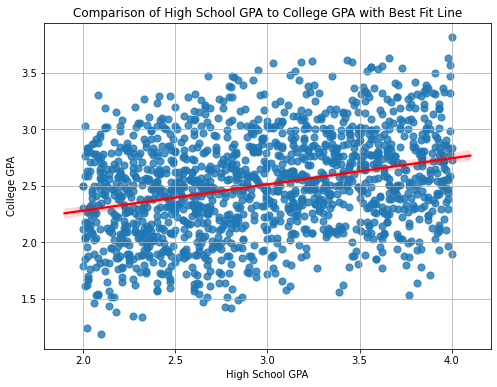

In [25]:
college_GPA = df['College GPA']
hs_GPA = df['High School GPA']

plt.figure(figsize=(8, 6))
sns.regplot(x=hs_GPA, y=college_GPA, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Comparison of High School GPA to College GPA with Best Fit Line')
plt.xlabel('High School GPA')
plt.ylabel('College GPA')
plt.grid(True)
plt.savefig("GPA_Correlation.png")
plt.show()

The scatterplot comparing high school GPA (x-axis) to college GPA (y-axis) shows a loosely linear relationship between the two variables. While the picture may look like a totally random scatter, if you follow the line of best fit you can see that the shape of the scattered data actually follows that gradually increasing trend across the entire graph, showing at least a minimal relationship present.

In [26]:
import scipy.stats as stats
correlation, p_value = stats.pearsonr(hs_GPA, college_GPA)
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between high school GPA and college GPA.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between high school GPA and college GPA.")

Pearson Correlation Coefficient: 0.29580527703314324
P-value: 3.9358931914986965e-31
Reject the null hypothesis: There is a significant correlation between high school GPA and college GPA.


So the Pearson Correlation Coefficient of 0.29 shows that there is a correlation on the higher end of the data, meaning that somewhat higher high school GPA's than the mean correlate to somewhat higher colleg GPA's than the mean. Additionally, the p-value of basically 0 confirms that the correlation shown from the Pearson Correlation Coefficient is a significant correlation.

# Question 2: Does having a part-time job in college contribute positively or negatively to GPA?


In [27]:
PT_job_ind = []
for i in df['Part-Time Job']:
    if i == 'No':
        PT_job_ind.append(0.0)
    else:
        PT_job_ind.append(1.0)

df['Part-Time Job Indicator'] = PT_job_ind
beta_1 = np.sum((PT_job_ind - np.mean(PT_job_ind)) * (college_GPA - np.mean(college_GPA))) / np.sum((PT_job_ind - np.mean(PT_job_ind))**2)
beta_0 = np.mean(college_GPA) - beta_1 * np.mean(PT_job_ind)

print(beta_1)
print(beta_0)

-0.03390128604904329
2.5181530343007914


To answer question 2, I am implementing a linear regression model with the formula Yi = B0 + B1Xi + E, where B0 (beta 0) represents the mean of the first group (no part time job), B1 (beta 1) represents the difference in mean from the first group and second group (part time job). E represents the error term.  Here I have broken the data into groups using an indicator for the no part time job group as 0 and an indicator for the part time job group as 1. I then calculated the beta1 and beta0 values, which are the calculated mean difference and the calculated mean of the no part time job group, respectively.

Hypothesis Test for Linear Regression:
Null Hypothesis: B1 = 0
Alternative Hypothesis: B1 != 0

In [28]:
predicted_GPA = float(beta_0) + float(beta_1) * df['Part-Time Job Indicator']
df['error'] = college_GPA - predicted_GPA

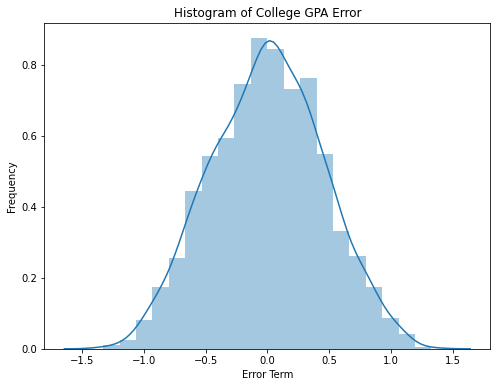

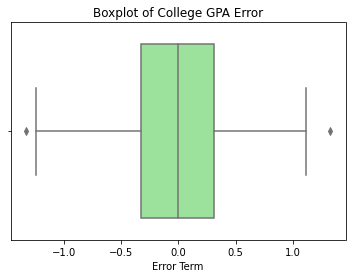

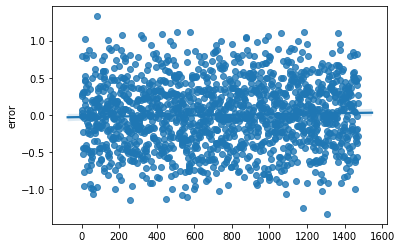

In [29]:
# 1. Histogram
plt.figure(figsize=(8, 6))
sns.distplot(df['error'], bins = 20)
plt.title("Histogram of College GPA Error")
plt.xlabel("Error Term")
plt.ylabel("Frequency")
plt.savefig("GPA_Error_Histogram.png")
plt.show()

# 2. Boxplot
sns.boxplot(df['error'], color='lightgreen')
plt.title("Boxplot of College GPA Error")
plt.xlabel("Error Term")
plt.savefig("GPA_Error_Boxplot.png")
plt.show()

# 3. Scatterplot
sns.regplot(x = list(range(len(df))), y = df['error'])
plt.savefig("GPA_Error_Scatter.png")
plt.show()

The histogram and boxplot of the error term, calculated using the beta1 and beta0 values, show a mostly normal distribution with a mean of 0. The histogram shows a slight variation from a normal distribution in one or two spots, while the box plot also shows 2 outliers in the data, however these things are not significant enough to declare the distribution of the error not normal. The third plot is a scatterplot of the error term, which shows that the variance of the error term from the mean is constant, since there is no trend or skew of the variance. What these three plots essentially prove is that the assumptions of indepence of the two groups, a normal distribution of the error term with a mean of 0, and a constant variance of the error are all satisfied, so the linear regression is an acceptable model to use for this comparison of variables.

In [30]:
degfr = len(df) - 2
t = beta_1 / np.sqrt(np.sum((df['error'])**2) / (degfr * np.sum((df['Part-Time Job Indicator'] - np.mean(df['Part-Time Job Indicator']))**2)))
t

-1.444774693988856

In [31]:
import scipy.stats as stats
p = 2 * (1 - stats.t.cdf(abs(t), degfr))
p

0.14873415359021291

Based on the calculated p-value of 0.15, when comparing to our alpha of 0.05 (commonly used alpha value), we fail to reject the null hypothesis. In the context of my question, this means that there is insignificant evidence to show that B1 (the difference between the mean of no part time job group and part time job group) is not equal to 0. This shows that the linear regression model proved no significant difference in the mean of college GPA between a group of students with a part time job and a group of students with no part time job

# Question 3: Is there a certain classification of major that consistently correlates to higher GPA, or is every major classification generally the same?

In [32]:
unique_majors = df['Major'].unique().size
unique_majors

5

There are 5 classifications of majors in the dataset, so we can determine if the variances of each classification of major are the same or different using an ANOVA model and table.

Null Hypothesis: alpha1 = alpha2 = alpha3 = alpha4 = alpha5

Alternative Hypothesis: at least one of the alphas is not equal

In [33]:
science = df[df['Major'] == 'Science']
engineering = df[df['Major'] == 'Engineering']
arts = df[df['Major'] == 'Arts']
business = df[df['Major'] == 'Business']
undeclared = df[df['Major'] == 'Undeclared']
#Note that the undeclared group in the dataset does not explicitly correlate to a student having no major,
# rather the students major was not declared in the dataset.


In [34]:
grand_mean = np.mean(df['College GPA'])
grand_mean

2.5016972165648337

In [35]:
sciMean = np.mean(science['College GPA'])
engMean = np.mean(engineering['College GPA'])
artMean = np.mean(arts['College GPA'])
busMean = np.mean(business['College GPA'])
undMean = np.mean(undeclared['College GPA'])
print('Mean GPA of Science Majors: ', sciMean)
print('Mean GPA of Engineering Majors: ', engMean)
print('Mean GPA of Arts Majors: ', artMean)
print('Mean GPA of Business Majors: ', busMean)
print('Mean GPA of Undeclared Majors: ', undMean)

Mean GPA of Science Majors:  2.538292682926829
Mean GPA of Engineering Majors:  2.531929824561404
Mean GPA of Arts Majors:  2.433342618384401
Mean GPA of Business Majors:  2.5015041782729805
Mean GPA of Undeclared Majors:  2.5190909090909086


In the ANOVA regression model, an important calculation in order to conduct the proper regression tests is the alpha value of each group. This value is the difference in the mean of the specific group and the grand mean, which is the mean of the population as a whole. This value is helpful in calculating the group sum of squares, which in turn will help calculate the test statistic for the ANOVA test.

In [36]:
alpha1 = sciMean - grand_mean
alpha2 = engMean - grand_mean
alpha3 = artMean - grand_mean
alpha4 = busMean - grand_mean
alpha5 = undMean - grand_mean
print("Science Major alpha value: ", alpha1)
print("Engineering Major alpha value: ", alpha2)
print("Art Major alpha value: ", alpha3)
print("Business Major alpha value: ", alpha4)
print("Undefined Major alpha value: ", alpha5)

Science Major alpha value:  0.0365954663619954
Engineering Major alpha value:  0.030232607996570238
Art Major alpha value:  -0.06835459818043255
Business Major alpha value:  -0.00019303829185313148
Undefined Major alpha value:  0.017393692526074922


In order to create the ANOVA table and calculate the test statistic and p value for the ANOVA model, we first need to calculate some values that will help in determining the test statistic:

Sum of Squares Group (SSG) = sum(group_i * alpha_i ^2) for i = 1 to n

Sum of Squares Error (SSE) = sum((n_i - 1) * variance_i) for i = 1 to n

Sum of Squares Total (SST) = SSG + SSE

Mean of Squares Group (MSG) = SSG / df for df = # groups - 1

Mean of Squares Error (MSE) = SSE / df for df = total # data entries - # groups

F statistic = MSG / MSE

In [37]:
sum_squares_group = (len(science)*alpha1**2) + (len(engineering)*alpha2**2) + (len(arts)*alpha3**2) + (len(business)*alpha4**2) + (len(undeclared)*alpha5**2)
sciVar = np.var(science['College GPA'])
engVar = np.var(engineering['College GPA'])
artVar = np.var(arts['College GPA'])
busVar = np.var(business['College GPA'])
undVar = np.var(undeclared['College GPA'])
sum_squares_error = ((len(science)-1)*sciVar) + ((len(engineering)-1)*engVar) + ((len(arts)-1)*artVar) + ((len(business)-1)*busVar) + ((len(undeclared)-1)*undVar)
sum_squares_total = sum_squares_group + sum_squares_error
mean_squares_group = sum_squares_group / 4
mean_squares_error = sum_squares_error / (len(df) - 5)
f = mean_squares_group / mean_squares_error
pval = 1 - stats.f.cdf(f, 4, (len(df) - 5))

anova = pd.DataFrame({'Source' : ['Group', 'Error', 'Total'],
                     'df' : [4, len(df) - 5, len(df) - 1],
                     'SS' : [sum_squares_group, sum_squares_error, sum_squares_total],
                     'MS' : [mean_squares_group, mean_squares_error, None],
                     'F Stat' : [f, None, None],
                     'P Value' : [pval, None, None]})

print(anova)

  Source    df          SS        MS    F Stat   P Value
0  Group     4    2.497466  0.624367  3.107828  0.014691
1  Error  1468  294.923068  0.200901       NaN       NaN
2  Total  1472  297.420534       NaN       NaN       NaN


From the ANOVA table created above, the p value of .014 is less than the alpha value of .05, so we can reject the null hypothesis and conclude that at least one of the alpha values is not equal to the others. In the context of the question, this means that every major classification does not generally correlate to the same GPA. However, in looking back at the mean GPA for every major classification, there is not definitive major that shows a higher GPA, but the Arts major shows a significantly lower mean GPA.

# Question 4: Which factors (Study hours, attendance, sleep, extracurriculars) are effective in determining a model for predicting college GPA?

For this question we are going to use a machine learning regression model to help us get an answer.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Study Hours per Week', 'Attendance Rate', 'Extracurricular Activities', 'Sleep Hours per Night']]
y = df['College GPA']

X = np.c_[np.ones(X.shape[0]), X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Mean Squared Error: 0.1062667442650011
R-squared: 0.4268707641131737
Intercept: 1.2702971986550116
Coefficients: [ 0.          0.02454978  0.01011616  0.00273693 -0.0039897 ]


The R squared value obtained for the model is 0.4269, meaning the model is not a great predictor in determining GPA. So I am now going to obtain the p values of each of the explanatory variables and try to get rid of any variables that are insignificant.

In [59]:
residuals = y_test - y_pred
residual_variance = np.var(residuals, ddof=2)
X_transpose = X_train.T
se = np.sqrt(np.diagonal(residual_variance * np.linalg.inv(np.dot(X_transpose, X_train))))
t_stats = model.coef_ / se
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=len(X_train) - X.shape[1])) for t in t_stats]
print(f"P-values: {p_values}")

P-values: [1.0, 0.0, 0.0, 0.6836791048188049, 0.46404810162607935]


In looking at the p values from each of the predicting variables included in the model, the last two are well over the alpha value of 0.05. So I am going to remove these two variables, being Extracurricular Activities and Sleep Hours per Night, and create a new model.

In [60]:
X2 = df[['Study Hours per Week', 'Attendance Rate']]
y2 = df['College GPA']

X2 = np.c_[np.ones(X2.shape[0]), X2]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error: {mse2}")
print(f"R-squared: {r2_2}")
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

Mean Squared Error: 0.10594925458500387
R-squared: 0.428583083606514
Intercept: 1.249284151377752
Coefficients: [0.         0.0245032  0.01010965]


The new R squared value of .4286 is only slightly higher than the previous R Squared value. With this we can conclude that Study Hours and Attendance Rate are slightly better predicting variables in GPA than are Extracurricular Activities and Sleep Hours, but overall these predictor variables do not give a very accurate prediction for a model determining College GPA.